# Keras Image Data Generator

- [keras io](https://keras.io/preprocessing/image/#imagedatagenerator)
- https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/

Keras provides pre-processing function to create more various and dynamic set of image data.

## Arguments :

```py
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())
```

## Methods :

- __fit(x)__ : Compute the internal data stats related to the data-dependent transformations, based on an array of sample data. Only required if featurewise_center or featurewise_std_normalization or zca_whitening.
- __flow(x, y)__: Takes numpy data & label arrays, and generates batches of augmented/normalized data. Yields batches indefinitely, in an infinite loop.
- __flow_from_directory(directory)__: Takes the path to a directory, and generates batches of augmented/normalized data. Yields batches indefinitely, in an infinite loop.


# Demonstrate .flow(x,y)
### Arguments:
- __x__: data. Should have rank 4. In case of grayscale data, the channels axis should have value 1, and in case of RGB data, it should have value 3.
- __y__: labels.
- batch_size: int (default: 32).
- shuffle: boolean (default: True).
- seed: int (default: None).
- save_to_dir: None or str (default: None). This allows you to optionally specify a directory to which to save the augmented pictures being generated (useful for visualizing what you are doing).
- save_prefix: str (default: ''). Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).
- save_format: one of "png", "jpeg" (only relevant if save_to_dir is set). Default: "png".

### yields:
- Tuples of (x, y) where x is a numpy array of image data and y is a numpy array of corresponding labels. The generator loops indefinitely.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from keras.datasets import mnist, cifar10

# Fix Randomseed
np.random.seed(5)

/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/skim0119/venv/GenP3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(10, 1, 28, 28)
(10,)


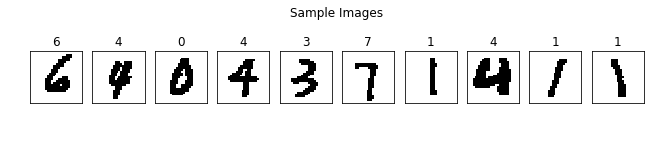

In [2]:
# Select Dataset
n_sample = 10
(x_train,y_train), (_,_) = mnist.load_data()
random_index = np.random.randint(len(x_train), size=n_sample)
x_train = x_train[random_index].reshape(n_sample, 1, 28, 28)
y_train  = y_train[random_index]
print(x_train.shape)
print(y_train.shape)

# Visualize Original Train-set
fig = plt.figure(figsize=(11,2))
plt.title('Sample Images')
plt.axis('off')
for i in range(10):
    subplot = fig.add_subplot(1, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % (y_train[i]))
    subplot.imshow(x_train[i].reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/keras/preprocessing/image.py:896: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (10, 1, 28, 28) (28 channels).
  ' (' + str(self.x.shape[channels_axis]) + ' channels).')


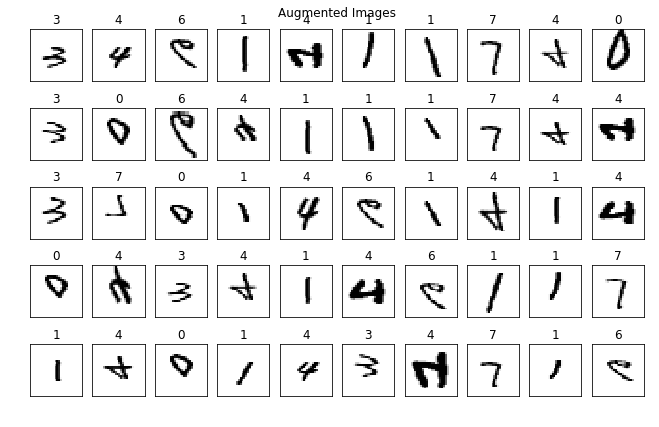

In [4]:
# Set Augmentation
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')

# Visualize Augmented Images
n_aug_image_row = 5
n_aug_image_col = n_sample

fig = plt.figure(figsize=(n_aug_image_col+1,n_aug_image_row+2))
plt.title('Augmented Images')
plt.axis('off')
image_index = 1
for im_row, (im, label) in enumerate(data_aug_gen.flow(x_train, y_train)): # Generate by .flow
    if im_row >= n_aug_image_row: break
    for im_col in range(n_aug_image_col):
        subplot = fig.add_subplot(n_aug_image_row, n_aug_image_col, image_index)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d' % (label[im_col]))
        subplot.imshow(im[im_col].reshape((28,28)), vmin=0, vmax=1,
                       cmap=plt.cm.gray_r, interpolation='nearest')
        image_index += 1